### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")


In [2]:
data_wine = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [3]:
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
sum(data_wine.duplicated())

240

In [6]:
data_wine.drop_duplicates(inplace = True)
sum(data_wine.duplicated())

0

In [7]:
data_wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [9]:
data_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [11]:
data_wine.shape

(1359, 12)

The number of data values for all the features are same and no missing values.

In [14]:
data_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
data_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
data_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the features present are the numerical one.

In [19]:
data_wine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [21]:
data_wine['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [22]:
data_wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.171231,0.578596,0.244523,2.509532,0.093971,17.161179,57.406412,0.997082,3.300815,0.623570,9.888562
6,8.337383,0.496084,0.279364,2.457290,0.085075,15.637383,40.816822,0.996565,3.318000,0.674542,10.658879
7,8.858683,0.403653,0.371856,2.716766,0.076832,13.994012,35.449102,0.996051,3.290060,0.742635,11.491118
8,8.441176,0.427647,0.382941,2.576471,0.068353,13.764706,34.470588,0.995095,3.274118,0.774706,12.158824


 Upon observing this i would be more intrested to see the graphical analysis for Dependent feature 'Quality' with respect to 
 Independent Features 'Volatile acidity', 'Citric acid', 'pH', 'Sulphates', 'alcohol' as they seem to significant impact on quality

# Graphical Analysis

### Scattered Plot to check the relationship between Independent and Dependent Feature

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

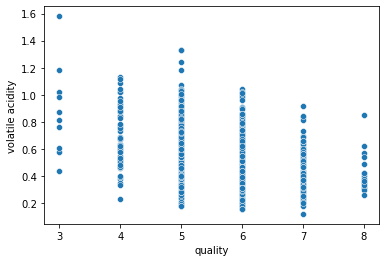

In [28]:
sns.scatterplot(y=data_wine['volatile acidity'],x=data_wine['quality'])

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

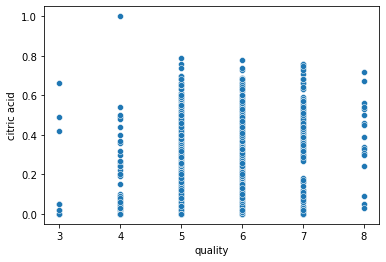

In [30]:
sns.scatterplot(y=data_wine['citric acid'],x=data_wine['quality'])

<AxesSubplot:xlabel='quality', ylabel='pH'>

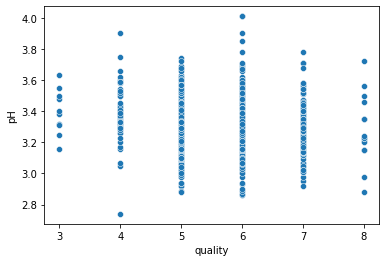

In [31]:
sns.scatterplot(y=data_wine['pH'],x=data_wine['quality'])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

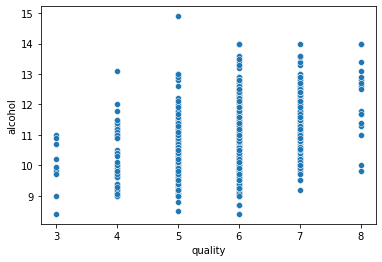

In [32]:
sns.scatterplot(y=data_wine['alcohol'],x=data_wine['quality'])

From the above scatter plots, I can conclude the level of alcohol concentration has a positive impact on wine quality.

### Distribution plot to observe how the features in the data set are distibuted.

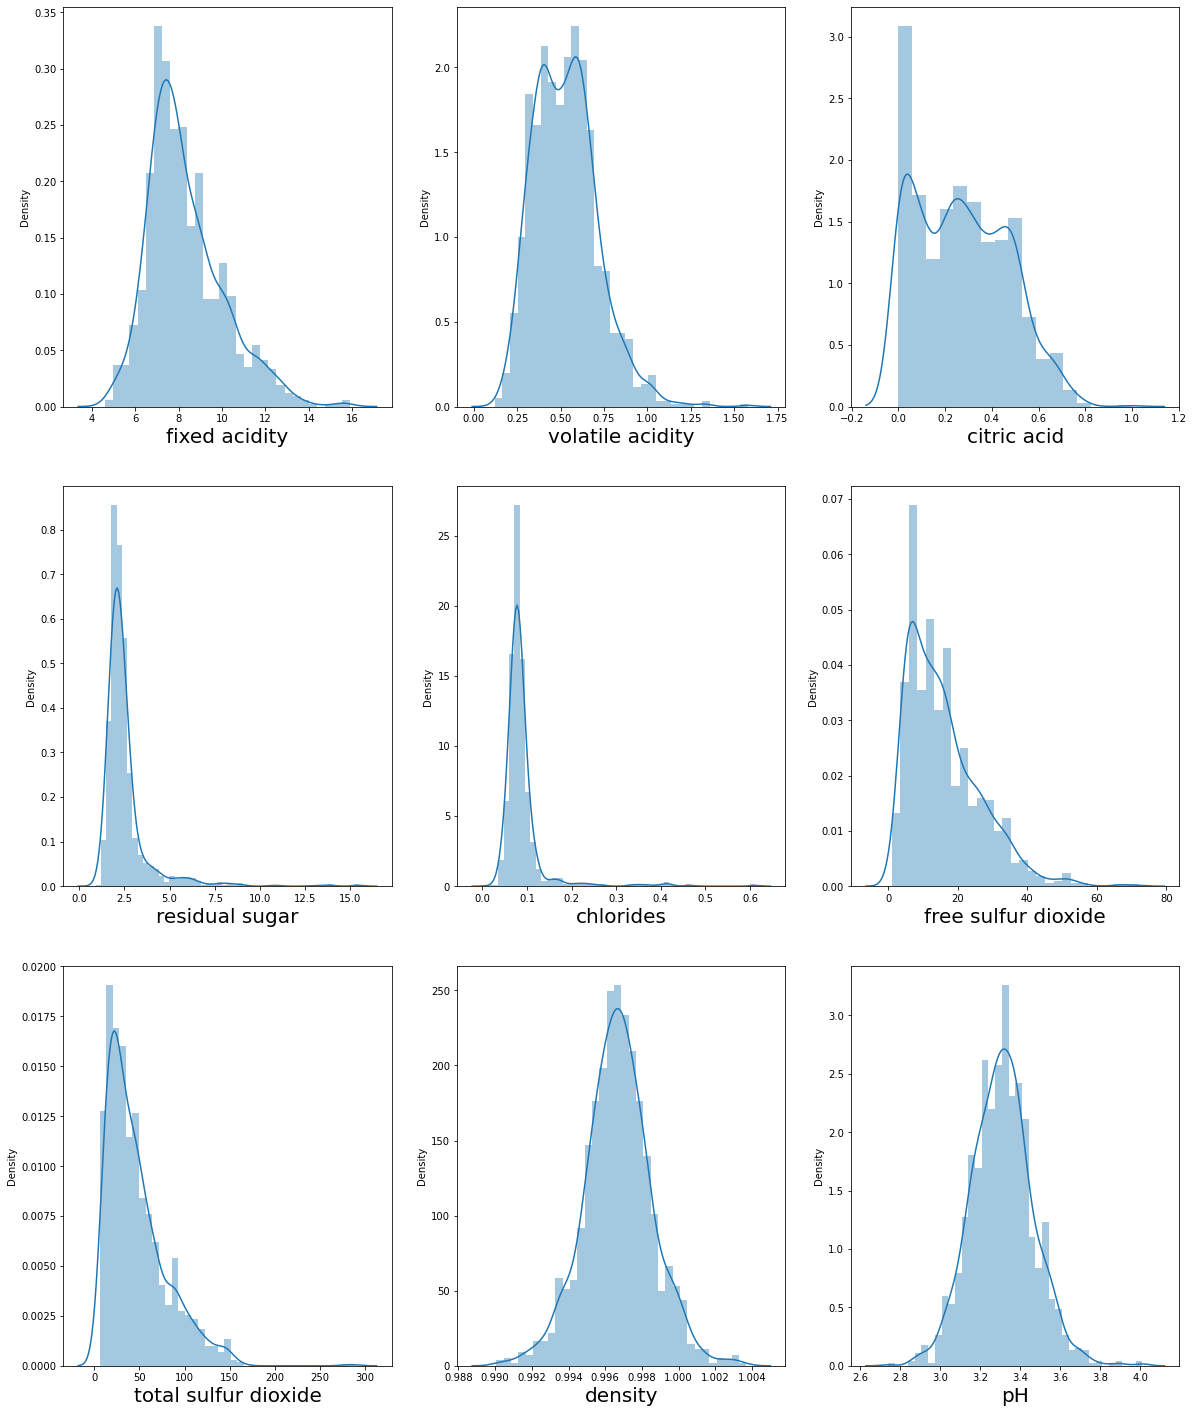

In [38]:
plt.figure(figsize=(20,25), facecolor='white') 
plotnumber = 1

for column in data_wine:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_wine[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Majority of the features are right skewed except density, pH which are normally distributed

### Checking Multicolinearity using Heat Map

<AxesSubplot:>

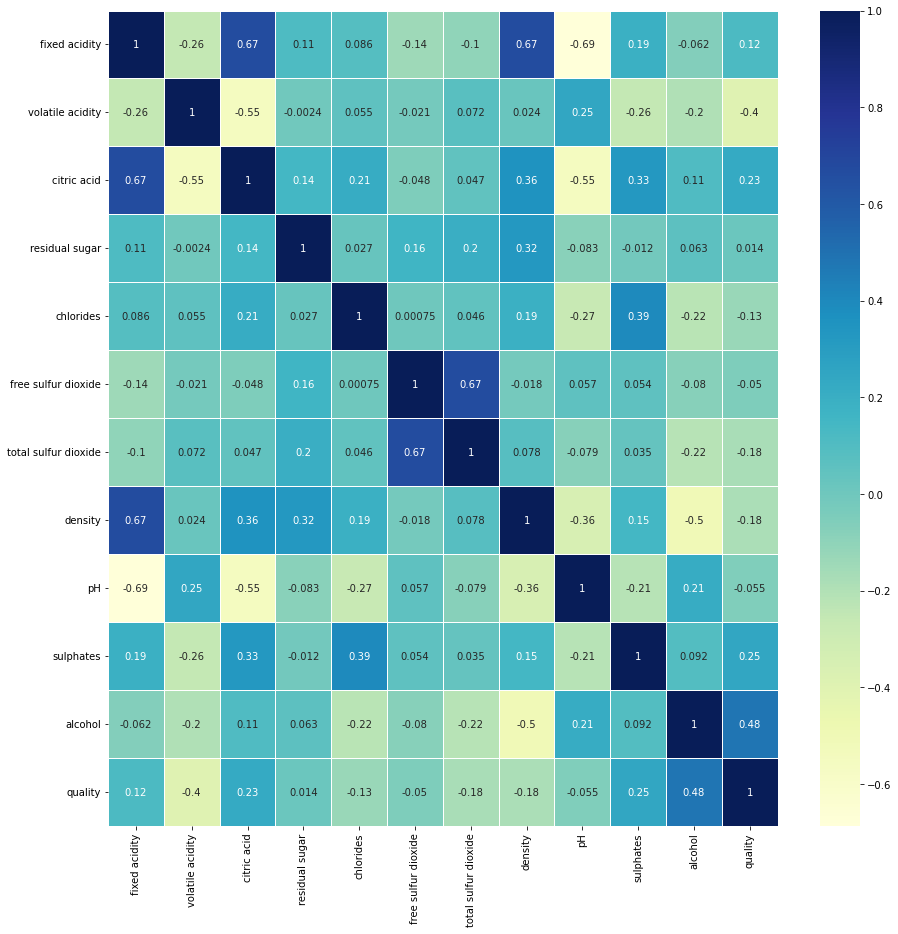

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(data_wine.corr(),annot=True,cmap='YlGnBu',linewidths=0.5)

<AxesSubplot:>

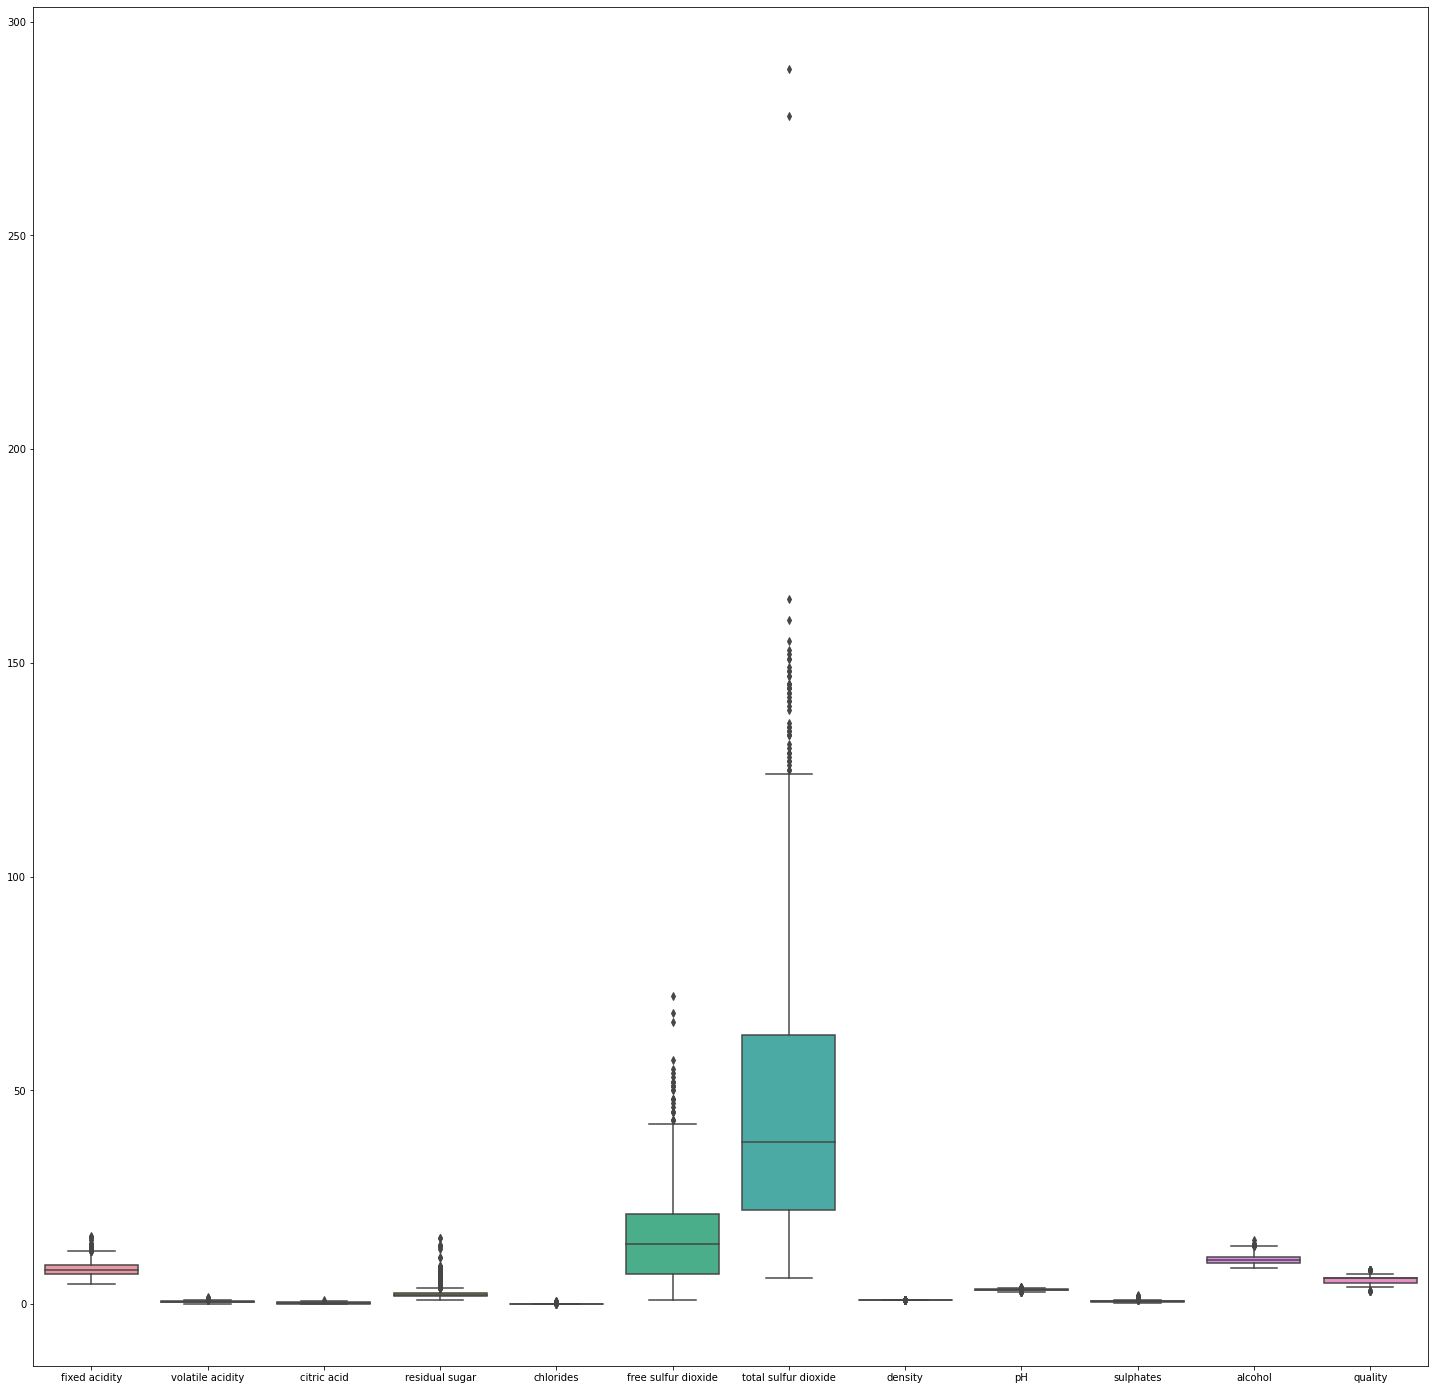

In [45]:
plt.subplots(figsize=(25,25)) 
sns.boxplot(data=data_wine)

Fixed Acidity, Residual Sugar, Free sulfur dioxide and total sulfur dioxide has the significant outliers

## Model Training

Seggregating Independent and dependent feature X and Y

In [48]:
X = data_wine.drop("quality", axis=1)
y = data_wine["quality"]

In [50]:
X.shape

(1359, 11)

In [51]:
y.shape

(1359,)

### Splitting the train & test data

In [52]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=5)

In [55]:
y_test

1132    7
995     6
682     5
892     6
584     7
       ..
372     6
1175    6
838     7
1526    6
907     6
Name: quality, Length: 340, dtype: int64

### Scaling the features

In [58]:
scaler = StandardScaler()

In [59]:
scaler.fit(X_train)

StandardScaler()

In [60]:
print(scaler.mean_)

[ 7.28672384e-16  3.52133544e-16 -7.67023562e-17 -3.13782366e-16
 -3.48647073e-17 -3.83511781e-17 -5.22970610e-17 -1.10207340e-14
  3.33655249e-15 -5.87470319e-16  5.78754142e-16]


In [61]:
X_train_tf=scaler.transform(X_train)

In [62]:
X_train_tf

array([[-1.89710740e-01,  5.05174429e-01,  3.76786450e-01, ...,
         1.01484685e-03, -2.23198955e-01,  3.48829743e-01],
       [ 1.82398972e+00, -2.90328584e-01,  6.28619975e-01, ...,
        -1.55017856e+00, -3.58515619e-02, -3.56838781e-01],
       [ 1.32056461e+00,  7.79485813e-01, -2.77980716e-01, ...,
        -1.92884329e-01,  2.02496976e+00, -4.79563742e-01],
       ...,
       [-4.13455236e-01, -1.53172892e-01,  7.45862197e-02, ...,
         6.56479054e-02, -2.23198955e-01,  9.93135787e-01],
       [-1.89710740e-01, -8.11520214e-01, -1.08384800e+00, ...,
         3.88813198e-01, -8.47690264e-01, -4.79563742e-01],
       [-7.49071980e-01, -1.53172892e-01, -6.80914356e-01, ...,
         1.42294213e+00, -2.85648086e-01, -1.93451392e-02]])

In [63]:
y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

### Model Building

In [64]:
from sklearn.svm import SVC
model=SVC()

In [65]:
model.fit(X_train,y_train)

SVC()

In [66]:
model.score(X_train_tf,y_train)

0.6565260058881256

In [67]:
X_test_tf=scaler.transform(X_test)

In [68]:
y_pred = model.predict(X_test_tf)

In [69]:
y_pred

array([7, 6, 5, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6,
       6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 7, 5, 6, 5, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7, 5, 6,
       6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 7, 6, 6, 7, 6,
       5, 6, 6, 5, 5, 7, 7, 6, 6, 6, 6, 5, 5, 6, 6, 6, 7, 5, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 7, 6, 6, 5, 6, 6,
       5, 6, 6, 5, 7, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5,
       6, 5, 5, 7, 6, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6,
       6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 5, 5, 6, 5,
       5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 7, 5,
       6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 7, 6, 5, 5, 5,

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test,y_pred)

0.6088235294117647

### Hyperparameter Tunning

#### GridSearchCV

In [72]:
Parameters = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}


In [73]:
Hyperparameter = GridSearchCV(svm.SVC(), Parameters, refit=True, verbose=3)
Hyperparameter.fit(X_train_tf, y_train)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.436 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.436 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.436 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.436 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.438 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.578 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.554 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [74]:
print(f"Best Parameters: {Hyperparameter.best_params_}")
print(f"Best Estimators: {Hyperparameter.best_estimator_}")


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimators: SVC(C=1, gamma=0.1)


In [76]:
HyperPred = Hyperparameter.predict(scaler.transform(X_test))
print("Classification Report of Wine Hyperparameter Model\n")
print(metrics.classification_report(y_test, HyperPred))

Classification Report of Wine Hyperparameter Model

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.61      0.83      0.70       132
           6       0.61      0.59      0.60       149
           7       0.56      0.23      0.33        43
           8       0.00      0.00      0.00         5

    accuracy                           0.61       340
   macro avg       0.30      0.27      0.27       340
weighted avg       0.58      0.61      0.58       340



### Accuracy increased by 0.12% after hyperparameter tuning